## Imports

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

In [48]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bryan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Functions

In [27]:
def read_file(path):
  # Read file into an array of strings
  lines = []
  with open(path, encoding="utf8") as file:
      lines = file.readlines()
  # Remove newline characters from each line
  lines = [line.strip() for line in lines]
  return lines

In [28]:
def tokenize_lines(lines):
  tokenized_lines = [nltk.word_tokenize(sentence) for sentence in lines]
  # Removing empty Lines
  tokenized_sentences = []
  for i in tokenized_lines:
    if i != []:
      tokenized_sentences.append(i)
  return tokenized_sentences

In [59]:
import re
def clean_text(lines):
    '''
        Input: List of sentences as strings
    '''
    # New list to store cleaned lines
    cleaned_lines = []
    # used for capitalization
    def replacement(match):
        return match.group(1).lower()
    # Loop through each line in lines
    for line in lines:
        # regex, remove punctuation, keep numbers and letters
        line = re.sub(r'[^a-zA-Z\s]+', '', line)
        line = re.sub(r'([A-Z])', replacement, line)
        if line != '':
            cleaned_lines.append(line)
    print(cleaned_lines)
    return cleaned_lines

In [31]:
'''
def vader_prediction(sia, text)
    '''
        Input: TextClassifier, List of sentences
        Output: List of rating for each sentence
    '''
    # New list to store ratings
    ratings = []
    # Loop through each line in text
    for line in text:
        # Create a sentence object
        sentence = Sentence(line)
        # Predict sentiment
        sia.predict(sentence)
        # Get sentiment value
        value = sentence.labels[0].score
        # Append to ratings
        ratings.append(value)
    return ratings
'''

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

## Running Functions

In [81]:
# path = 'chapter_one.txt'
path = 'The Tale of Genji (Arthur Waley Translation) (Cleaned - Pure Text).txt'
lines = read_file(path)
cleaned_lines = clean_text(lines)
print(cleaned_lines)
# tokenized_sentences = tokenize_lines(cleaned_lines)
# print(tokenized_sentences)

['at the court of an emperor he lived it matters not when there was among the many gentlewomen of the wardrobe and chamber one who though she was not of very high rank was favored far beyond all the rest so that the great ladies of the palace each of whom had secretly hoped that she herself would be chosen looked with scorn and hatred upon the upstart who had dispelled their dreams still less were her former companions the minor ladies of the wardrobe content to see her raised so far above them thus her position at court preponderant though it was exposed her to constant jealousy and ill will and soon worn out with petty vexations she fell into a decline growing very melancholy and retiring frequently to her home but the emperor so far from wearying of her now that she was no longer well or gay grew every day more tender and paid not the smallest heed to those who reproved him till his conduct became the talk of all the land and even his own barons and courtiers began to look askance a

## Running Flair Sentiment Analysis

In [87]:
sia = SentimentIntensityAnalyzer()
# df["sentiment_score"] = df["reviews.text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df = pd.DataFrame(cleaned_lines)
df["text"] = pd.DataFrame(cleaned_lines)
'''
ratings = cleaned_lines.apply(lambda x: sia.polarity_scores(x)["compound"])
print(ratings)
'''
df["sentiment_score"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])
# get average from sentiment_score
average = df["sentiment_score"].mean()
print(average)
print(len(df))

0.2228255641748942
2836


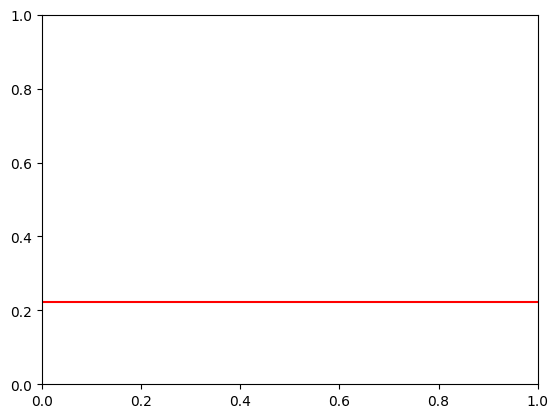

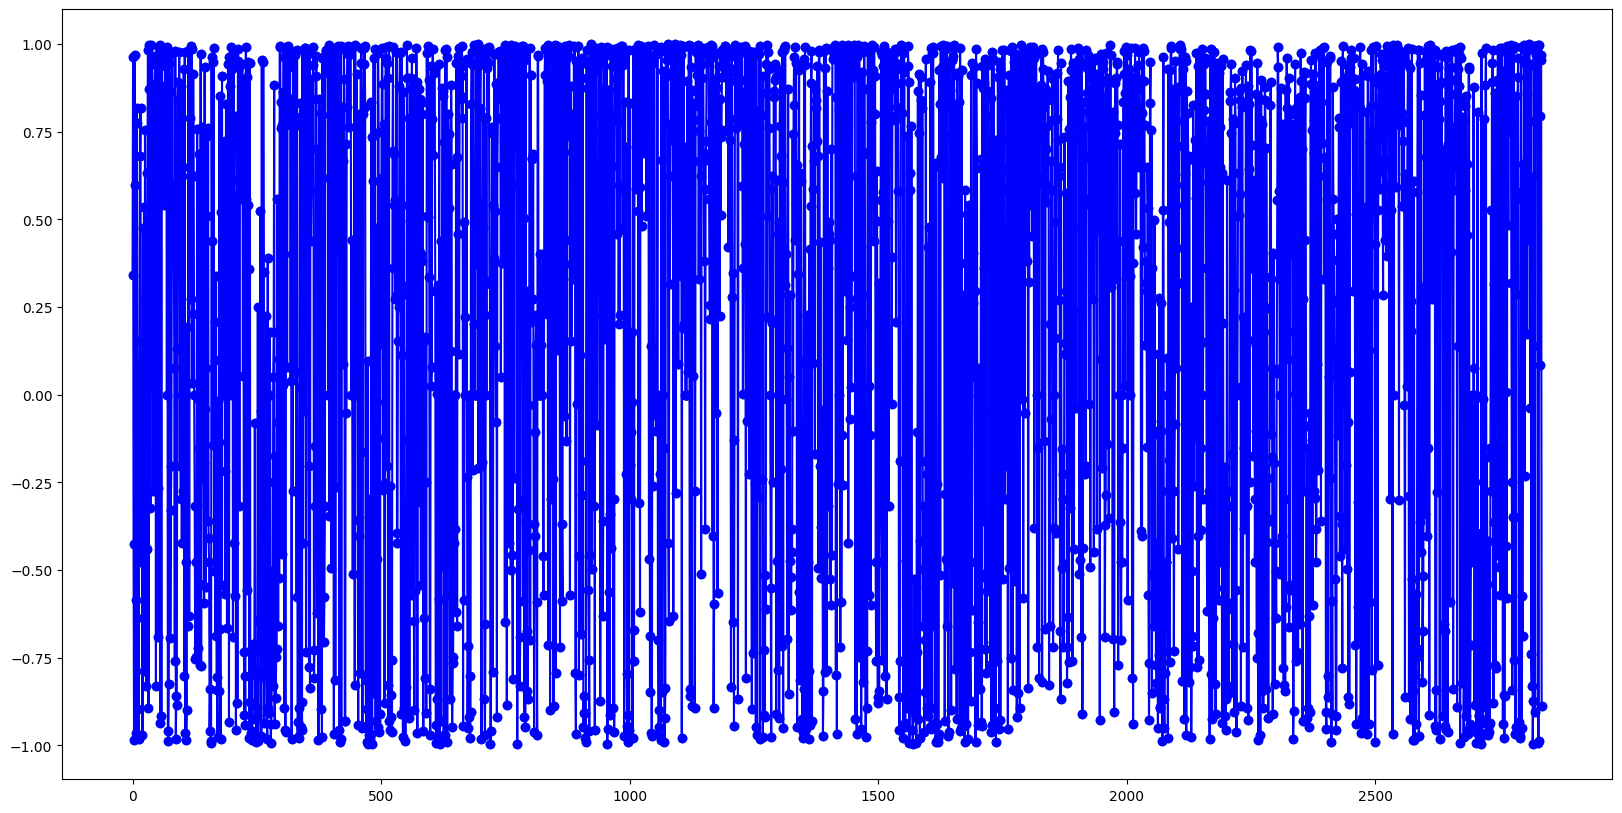

In [91]:
# make a chart mapping the sentiment score using matplotlib
x = df.index
y = df["sentiment_score"]
# add a line representing the average
plt.axhline(y=average, color='r', linestyle='-')
# draw a line from each dot to the next, and make the line smooth and curvy
# zoom the plot out to accomodate 2800 x values
plt.figure(figsize=(20,10))
plt.plot(x, y, '-o', color='b', markevery=1)
plt.scatter(x, y)
# save the plot to a file
plt.savefig('sentiment.png')

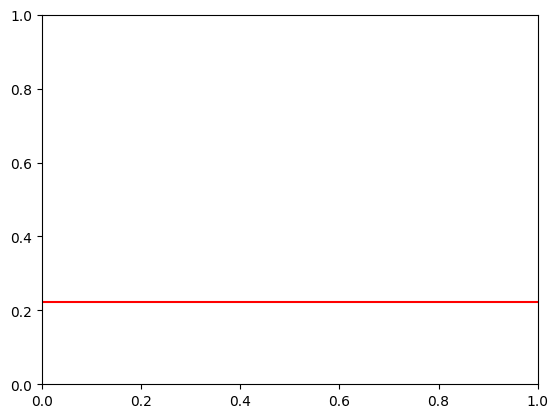

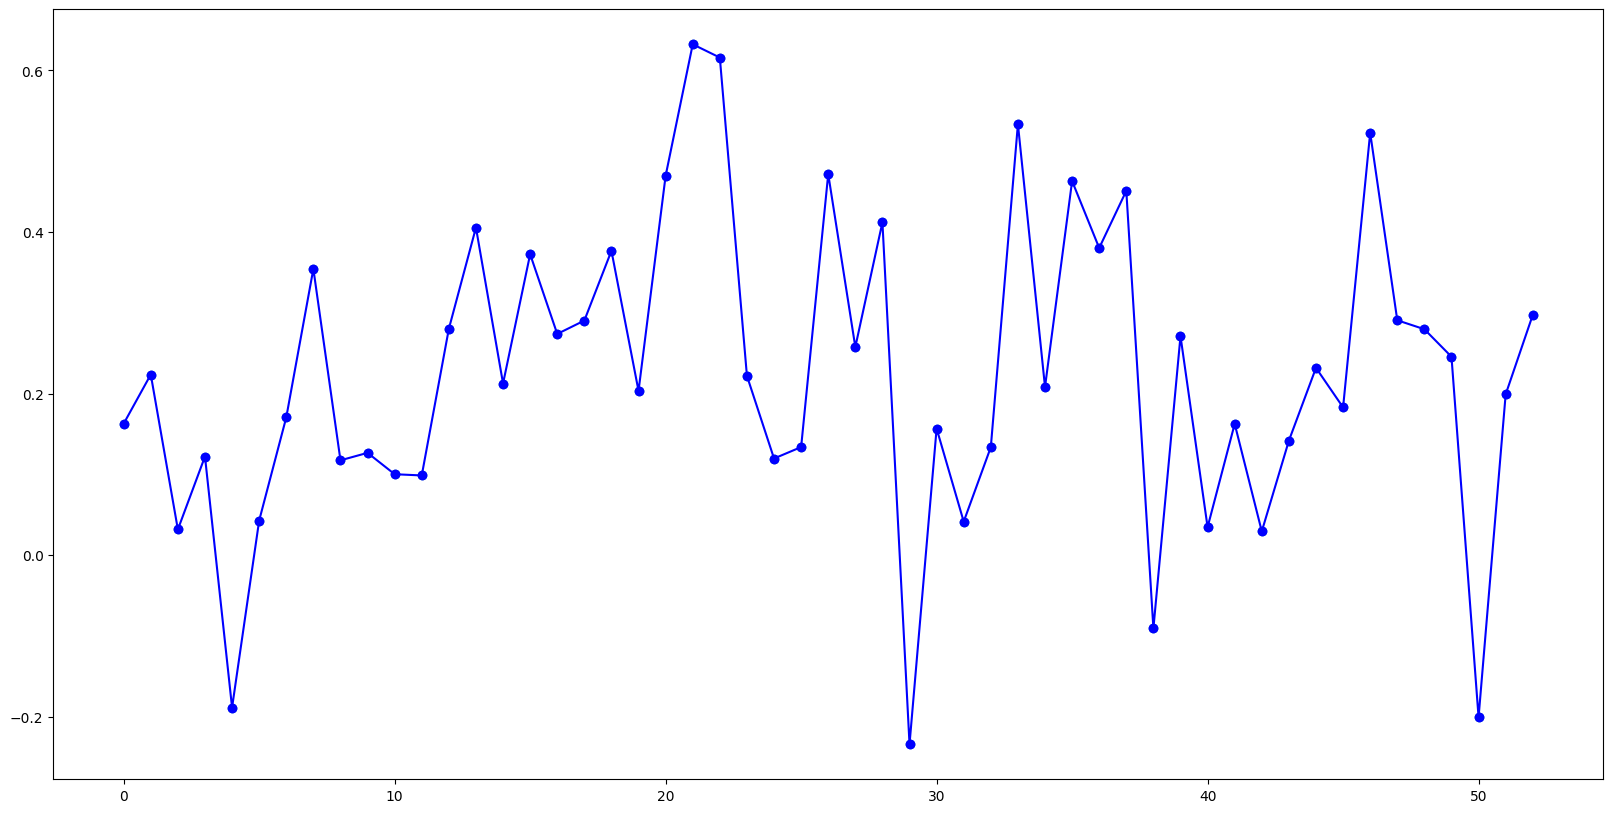

In [93]:
# group the df into 54 groups
groups = df.groupby(np.arange(len(df))//54)
# get the average of each group
averages = groups.mean()
# plot the averages
x = averages.index
y = averages["sentiment_score"]
# add a line representing the average
plt.axhline(y=average, color='r', linestyle='-')
# draw a line from each dot to the next, and make the line smooth and curvy
# zoom the plot out to accomodate 2800 x values
plt.figure(figsize=(20,10))
plt.plot(x, y, '-o', color='b', markevery=1)
plt.scatter(x, y)
# save the plot to a file
plt.savefig('sentiment_averages.png')